<b> Project Proposal: <b>


In [3]:
import imdb
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS


class MovieSearch:

    def __init__(self, search_word):

        # imdb object created
        self.ia = imdb.IMDb()

        # assign incoming word to instance
        self.search_word = search_word

        # execute the search using the object and assign list of objects to search_results
        self.search_results = self.search()

        # take list of result objects and find id's for each
        self.list_of_id = self.get_list_of_movie_id()

        # using id's create a result dataframe
        self.result_df = self.create_movie_search_dataframe()

    # the following searches the api by the search word
    def search(self):
        return self.ia.get_keyword(self.search_word)

    # this gets the movie id from the search results
    def get_list_of_movie_id(self):
        list_of_id = []
        for i in range(len(self.search_results)):
            list_of_id.append(self.search_results[i].movieID)
        return list_of_id

    def create_movie_search_dataframe(self):
        movie_id = []
        title = []
        year = []
        plot = []
        for i in range(len(self.search_results)):
            movie = self.ia.get_movie(self.list_of_id[i])
            movie_id.append(self.list_of_id[i])
            title.append(movie.get('title'))
            year.append(movie.get('year'))
            plot.append(movie.get('plot'))
        data = {'movie_id': movie_id,
                'title': title,
                'year': year,
                'plot': plot}
        df = pd.DataFrame.from_dict(data)
        df = df[df['year'].notna()]
        df['year'] = df['year'].astype('int')
        df.sort_values(by=['year'], ascending=False, inplace=True)
        return df

In [4]:
fire = MovieSearch('fire')
fire_df = fire.result_df

In [5]:
fire_df

,movie_id,title,year,plot
1,7737786,Greenland,2020,[A family struggles for survival in the face o...
2,12411074,Paranormal,2020,"[Set in the 1960s, the series, packed with mys..."
3,4682266,The New Mutants,2020,"[Five young mutants, just discovering their ab..."
4,6723592,Tenet,2020,"[Armed with only one word, Tenet, and fighting..."
29,0983946,Fantasy Island,2020,[When the owner and operator of a luxurious is...
8,10059518,Unhinged,2020,[After a confrontation with an unstable man at...
30,2850386,The Croods: A New Age,2020,[The prehistoric family the Croods are challen...
14,1051906,The Invisible Man,2020,[When Cecilia's abusive ex takes his own life ...
12,3833480,The Outpost,2020,[A small team of U.S. soldiers battle against ...
13,8579674,1917,2019,"[April 6th, 1917. As a regiment assembles to w..."


<AxesSubplot:xlabel='year'>

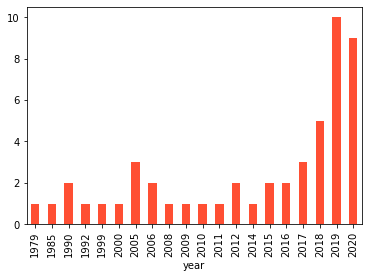

In [6]:
fire_df.groupby(['year'])['movie_id'].count().plot(kind='bar', color='#FF4F33')

In [ ]:
ice = MovieSearch('ice')
ice_df = ice.result_df

In [ ]:
ice_df.groupby(['year'])['movie_id'].count().plot(kind='bar', color='#3386FF')

In [ ]:
ice_df

In [165]:
def clean_plot_descriptions(each_plot_description):
    plot_words = []
    for i in range (len(each_plot_description)):
        for word in each_plot_description[i].split():
            if(len(word.split("::")) == 1 and len(word.split("{")) == 1):
                plot_words.append(word)
    return plot_words

In [169]:
fire_df['plot'] = fire_df['plot'].apply(clean_plot_descriptions)

In [223]:
import re

def get_master_plot_word_list(df_series):
    master_plot_list = []
    for lists in df_series:
        for words in lists:
            res = re.sub(r'[^\w\s]', '', words)
            master_plot_list.append(res)
    return master_plot_list

In [228]:
fire_words = get_master_plot_word_list(fire_df['plot'])

In [241]:
len(fire_words)

19701

In [1]:
from wordcloud import WordCloud, STOPWORDS
# https://www.geeksforgeeks.org/generating-word-cloud-python/

def word_cloud(word_list):
    plot_words = '' 
    stopwords = set(STOPWORDS)
    addtnl_stopwords = ['will', 'must']
  
    # iterate through the csv file 
    for val in word_list: 
      
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        plot_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(plot_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

In [2]:
word_cloud(fire_words)

NameError: name 'fire_words' is not defined

In [238]:
ice_df['plot'] = ice_df['plot'].apply(clean_plot_descriptions)

In [239]:
ice_words = get_master_plot_word_list(ice_df['plot'])

In [242]:
len(ice_words)

21526

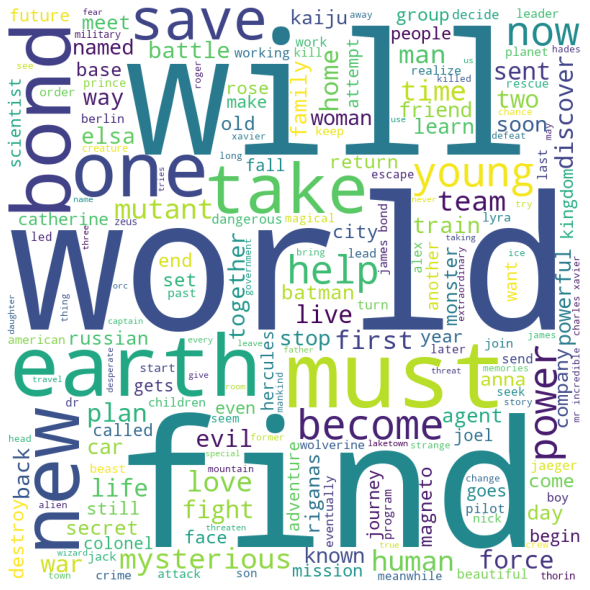

In [240]:
word_cloud(ice_words)

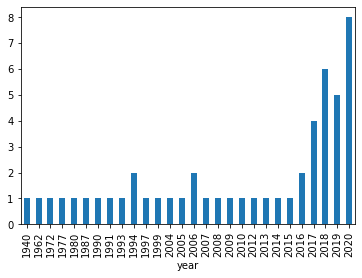

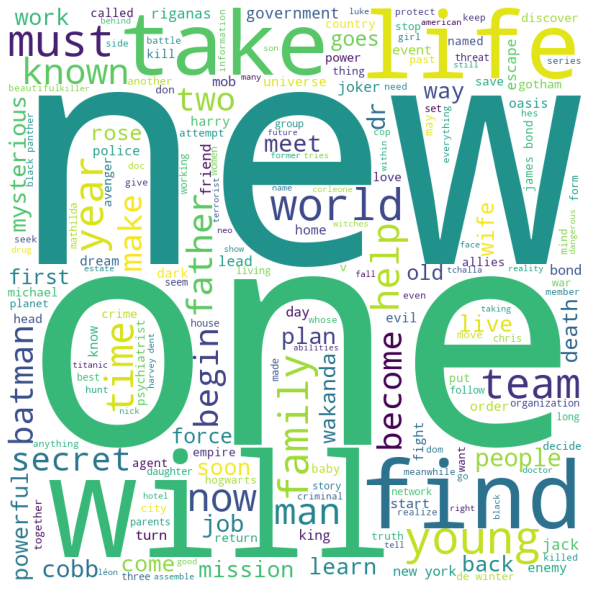

In [243]:
elev = MovieSearch('elevator')
elev_df = elev.result_df
elev_df.groupby(['year'])['movie_id'].count().plot(kind='bar')
elev_words = get_master_plot_word_list(elev_df['plot'])
word_cloud(elev_words)